In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## predict delivery time using sorting time 

In [2]:
del_time = pd.read_csv('delivery_time.csv')

In [3]:
del_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
del_time = del_time.rename({'Delivery Time': 'Delivery_Time'}, axis=1)
del_time = del_time.rename({'Sorting Time': 'Sorting_Time'}, axis=1)

In [5]:
del_time.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
del_time.shape

(21, 2)

In [7]:
del_time.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
del_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
del_time.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


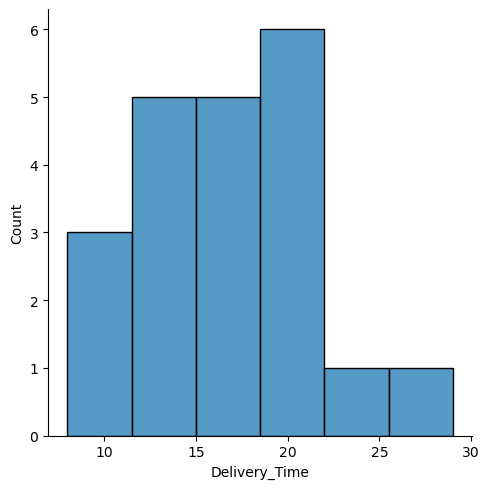

In [10]:
sns.displot(del_time['Delivery_Time'])
plt.show()

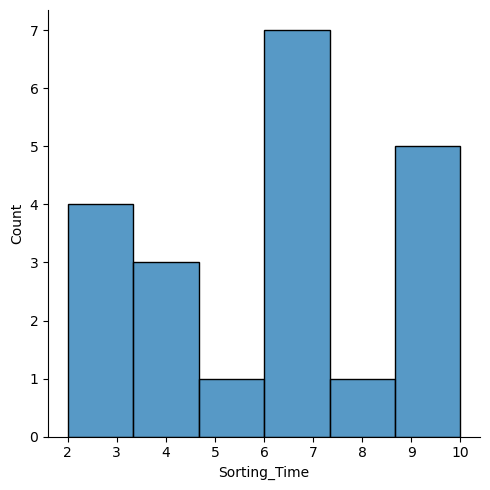

In [11]:
sns.displot(del_time['Sorting_Time'])
plt.show()

In [12]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data=del_time).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        06:17:39   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

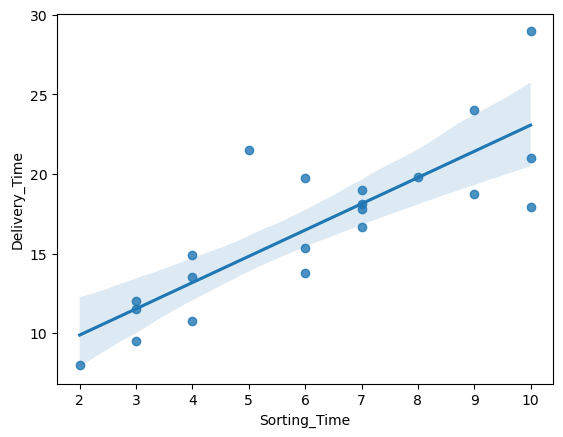

In [14]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=del_time);
plt.show()

In [15]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [16]:
model.tvalues , model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [17]:
print((model.rsquared*100,model.rsquared_adj*100))

(68.2271474841723, 66.55489208860243)


# Model Performance

In [18]:
# Prediction forsortint_time 4, 5, 6
df=pd.Series([4,5,6])
df

0    4
1    5
2    6
dtype: int64

In [19]:
df_pred=pd.DataFrame(df,columns=['Sorting_Time'])
df_pred

,Sorting_Time
0,4
1,5
2,6


In [20]:
model.predict(df_pred)

0    13.178814
1    14.827833
2    16.476853
dtype: float64

# 2. Salary_hike -> Build a prediction model for Salary_hike

In [21]:
salary = pd.read_csv("Salary_Data (1).csv")

In [22]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [23]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [24]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


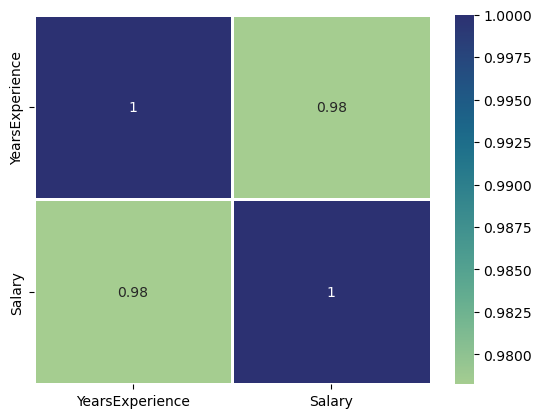

In [25]:
sns.heatmap(salary.corr(), annot=True, linewidths=1, linecolor='white', cmap='crest')
plt.show()

In [26]:
salary_model = smf.ols("Salary~YearsExperience",data=salary).fit()

In [27]:
salary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        06:17:40   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
print( "Model Accuracy is :", 0.955*100)

Model Accuracy is : 95.5


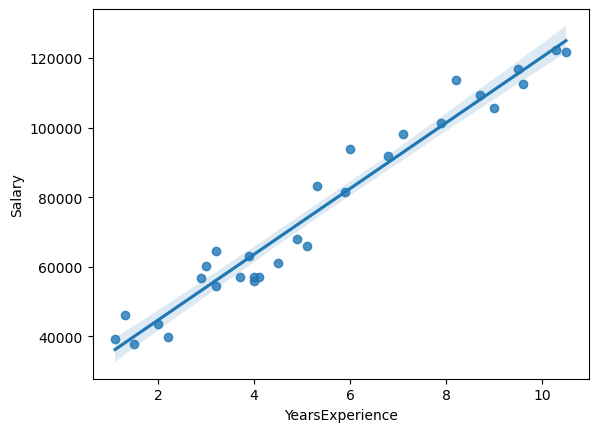

In [29]:
sns.regplot(x="YearsExperience", y="Salary", data=salary);
plt.show()

In [30]:
salary_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [31]:
print(salary_model.tvalues, '\n', salary_model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


# Model Performance

In [32]:
newdf=pd.Series([15,18, 20])

In [33]:
newdf_pred=pd.DataFrame(newdf,columns=['YearsExperience'])

In [34]:
salary_model.predict(newdf_pred)

0    167541.635020
1    195891.521985
2    214791.446628
dtype: float64